In [4]:
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

In [3]:
!pip install contractions


  Using cached https://files.pythonhosted.org/packages/e1/49/fdb0d85fdcb22cdb9993986a350f7ea6e80e495dd6b874cf76b942ddbb68/contractions-0.0.58-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d3/fe/021d7d76961b5ceb9f8d022c4138461d83beff36c3938dc424586085e559/textsearch-0.0.21-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7f/c2/eae730037ae1cbbfaa229d27030d1d5e34a1e41114b21447d1202ae9c220/pyahocorasick-1.4.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/6d/7b/19437c9a5bd16e1bb3a5bf43f7655e341882befceae0122e43c8e2c21e1e/anyascii-0.3.0-py3-none-any.whl
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-win_amd64.whl size=38950 sha256=5c563937f304c29421502651ee55774b701c2d3a8473fcc98cca268e2a051663
  Stored in directory: C:\Users\96ank\AppData\Local\pip\Cache\wheels\3a\03\34\77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
  Found existing installation: fsspec 0

ERROR: spyder 3.3.6 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 3.3.6 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.


In [5]:
submissions = "data/investing_submissions_features_tickers.csv"
df_submissions = pd.read_csv(submissions, delimiter=";")
df_submissions.head()

C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,created_utc,author,created_utc.1,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens,tickers
0,2021-11-26 15:17:50,plszvlko,2021-11-26 15:17:50,r2po7v,NaN,1,1,1955286,[removed],What do you use to invest?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"['What', 'do', 'you', 'use', 'to', 'invest', '?']","['[', 'removed', ']']",NaN
1,2021-11-26 14:43:13,eopif,2021-11-26 14:43:13,r2oynm,NaN,1,1,1955263,[removed],Where does flow data providers get their data from?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"['Where', 'does', 'flow', 'data', 'providers', 'get', 'their', 'data', 'from', '?']","['[', 'removed', ']']",NaN
2,2021-11-26 14:11:28,VonDerBerg,2021-11-26 14:11:28,r2ob2e,NaN,1,1,1955253,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,$NVAX new variant. Approvals. Lift-off.,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"['$', 'NVAX', 'new', 'variant', '.', 'Approvals', '.', 'Lift', '-', 'off', '.']","['So', 'the', 'markets', 'are', 'tanking', 'on', 'new', 'variant', 'news', '.', '$', 'NVAX', 'ju...","['YOU', 'UK', 'WE', 'NVAX', 'NOW', 'ARE', 'AN', 'FOR']"
3,2021-11-26 14:11:07,AccountForFinance,2021-11-26 14:11:07,r2oaua,NaN,1,1,1955253,[removed],Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"['Need', 'Advice', 're', '%', 'Allocation', 'to', 'Stocks', 'and', 'ROTH', 'Backdoor', 'Conversi...","['[', 'removed', ']']",NaN
4,2021-11-26 13:56:37,ascends-me,2021-11-26 13:56:37,r2o0ww,NaN,1,1,1955247,[removed],how do you seek crypto guidance?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"['how', 'do', 'you', 'seek', 'crypto', 'guidance', '?']","['[', 'removed', ']']",NaN


In [6]:
df_submissions.index = pd.DatetimeIndex(df_submissions.created_utc)
# drop duplicate columns
df_submissions.drop('created_utc.1', axis=1, inplace=True)
df_submissions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127768 entries, 2021-11-26 15:17:50 to 2017-12-29 18:43:47
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   created_utc            127768 non-null  object 
 1   author                 127768 non-null  object 
 2   id                     127768 non-null  object 
 3   link_flair_text        2521 non-null    object 
 4   num_comments           127768 non-null  int64  
 5   score                  127768 non-null  int64  
 6   subreddit_subscribers  127768 non-null  int64  
 7   selftext               122158 non-null  object 
 8   title                  127768 non-null  object 
 9   upvote_ratio           127768 non-null  float64
 10  title_polarity         127768 non-null  float64
 11  title_subjectivity     127768 non-null  float64
 12  body_polarity          127768 non-null  float64
 13  body_subjectivity      127768 non-null  float64
 14  po

In [7]:
df_NLP = df_submissions.loc[:,['id','title','selftext']]
df_NLP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127768 entries, 2021-11-26 15:17:50 to 2017-12-29 18:43:47
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        127768 non-null  object
 1   title     127768 non-null  object
 2   selftext  122158 non-null  object
dtypes: object(3)
memory usage: 3.9+ MB


## 1. Text Pre-Processing

In [8]:
for col in df_NLP.columns:
    print(col, df_NLP[col].isnull().sum())

id 0
title 0
selftext 5610


In [9]:
df_NLP['selftext'] = df_NLP['selftext'].fillna("")
df_NLP['selftext'] = df_NLP['selftext'].astype(str)

## 1.1 Expanding Contractions

In [10]:
df_NLP['title_no_contract'] = df_NLP['title'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_NLP['selftext_no_contract'] = df_NLP['selftext'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [11]:
df_NLP.head(10)

,id,title,selftext,title_no_contract,selftext_no_contract
created_utc,,,,,
2021-11-26 15:17:50,r2po7v,What do you use to invest?,[removed],"[What, do, you, use, to, invest?]",[[removed]]
2021-11-26 14:43:13,r2oynm,Where does flow data providers get their data from?,[removed],"[Where, does, flow, data, providers, get, their, data, from?]",[[removed]]
2021-11-26 14:11:28,r2ob2e,$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,"[$NVAX, new, variant., Approvals., Lift-off.]","[So, the, markets, are, tanking, on, new, variant, news., $NVAX, just, might, save, the, day, wi..."
2021-11-26 14:11:07,r2oaua,Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],"[Need, Advice, re, %, Allocation, to, Stocks, and, ROTH, Backdoor, Conversion]",[[removed]]
2021-11-26 13:56:37,r2o0ww,how do you seek crypto guidance?,[removed],"[how, do, you, seek, crypto, guidance?]",[[removed]]
2021-11-26 13:41:00,r2nqtj,Margin Call: Based on ELV or NLV?,[removed],"[Margin, Call:, Based, on, ELV, or, NLV?]",[[removed]]
2021-11-26 13:36:12,r2nnar,ELI5: institutions loaning out shares after buying them,[removed],"[ELI5:, institutions, loaning, out, shares, after, buying, them]",[[removed]]
2021-11-26 13:35:18,r2nmp6,Margin Call: Based on ELV or NLV?,[removed],"[Margin, Call:, Based, on, ELV, or, NLV?]",[[removed]]
2021-11-26 13:32:57,r2nl1o,ELI5: Institutions loading up on a stock to loan it out,[removed],"[ELI5:, Institutions, loading, up, on, a, stock, to, loan, it, out]",[[removed]]


In [12]:
# turn no contract columns back into strings
df_NLP['title_str'] = [' '.join(map(str, l)) for l in df_NLP['title_no_contract']]
df_NLP['selfttext_str'] = [' '.join(map(str, l)) for l in df_NLP['selftext_no_contract']]

In [13]:
df_NLP.head(10)

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str
created_utc,,,,,,,
2021-11-26 15:17:50,r2po7v,What do you use to invest?,[removed],"[What, do, you, use, to, invest?]",[[removed]],What do you use to invest?,[removed]
2021-11-26 14:43:13,r2oynm,Where does flow data providers get their data from?,[removed],"[Where, does, flow, data, providers, get, their, data, from?]",[[removed]],Where does flow data providers get their data from?,[removed]
2021-11-26 14:11:28,r2ob2e,$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,"[$NVAX, new, variant., Approvals., Lift-off.]","[So, the, markets, are, tanking, on, new, variant, news., $NVAX, just, might, save, the, day, wi...",$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...
2021-11-26 14:11:07,r2oaua,Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],"[Need, Advice, re, %, Allocation, to, Stocks, and, ROTH, Backdoor, Conversion]",[[removed]],Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed]
2021-11-26 13:56:37,r2o0ww,how do you seek crypto guidance?,[removed],"[how, do, you, seek, crypto, guidance?]",[[removed]],how do you seek crypto guidance?,[removed]
2021-11-26 13:41:00,r2nqtj,Margin Call: Based on ELV or NLV?,[removed],"[Margin, Call:, Based, on, ELV, or, NLV?]",[[removed]],Margin Call: Based on ELV or NLV?,[removed]
2021-11-26 13:36:12,r2nnar,ELI5: institutions loaning out shares after buying them,[removed],"[ELI5:, institutions, loaning, out, shares, after, buying, them]",[[removed]],ELI5: institutions loaning out shares after buying them,[removed]
2021-11-26 13:35:18,r2nmp6,Margin Call: Based on ELV or NLV?,[removed],"[Margin, Call:, Based, on, ELV, or, NLV?]",[[removed]],Margin Call: Based on ELV or NLV?,[removed]
2021-11-26 13:32:57,r2nl1o,ELI5: Institutions loading up on a stock to loan it out,[removed],"[ELI5:, Institutions, loading, up, on, a, stock, to, loan, it, out]",[[removed]],ELI5: Institutions loading up on a stock to loan it out,[removed]


## 1.2 English Language Detection

In [14]:
pretrained_model = "data/lid.176.bin" 
model = fasttext.load_model(pretrained_model)
langs = []
for sent in df_NLP['selfttext_str']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
df_NLP['langs'] = langs

In [15]:
df_NLP['langs'].unique()

array(['go', 'en', 'fr', 'la', 'pt', 'eu', 'eo', 'si', 'ja', 'de', 'it',
       'tr', 'ar', 'ru', 'nl', 'hu', 'zh', 'uk', 'es', 'kk', 'uz', 'ms',
       'ca', 'fa', 'ga', 'et', 'hr', 'pl', 'sh', 'sv', 'vi'], dtype=object)

In [16]:
df_langs = df_NLP.groupby("langs")["langs"].count().sort_values(ascending=False)
print(f"{len(df_langs)} languages:\n{df_langs.index.values}\n")
print(f"Top 15 languages count:\n{df_langs.head(87)}")

31 languages:
['en' 'go' 'fr' 'ru' 'zh' 'de' 'ja' 'it' 'nl' 'es' 'pt' 'pl' 'la' 'hu'
 'eo' 'fa' 'ar' 'uk' 'hr' 'eu' 'ca' 'uz' 'et' 'sh' 'tr' 'ga' 'si' 'vi'
 'kk' 'ms' 'sv']

Top 15 languages count:
langs
en    73178
go    54388
fr       33
ru       29
zh       24
de       20
ja       19
it       18
nl       11
es        9
pt        4
pl        4
la        4
hu        3
eo        3
fa        3
ar        2
uk        2
hr        2
eu        1
ca        1
uz        1
et        1
sh        1
tr        1
ga        1
si        1
vi        1
kk        1
ms        1
sv        1
Name: langs, dtype: int64


<AxesSubplot:xlabel='langs'>

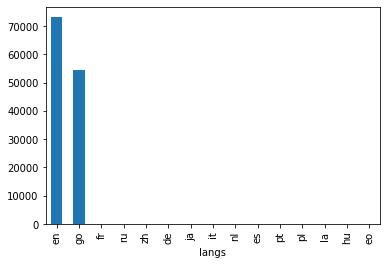

In [17]:
df_langs.head(15).plot.bar()

In [18]:
df_NLP[df_NLP['langs'] == 'ja']

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str,langs
created_utc,,,,,,,,
2020-12-04 02:59:36,k6cc7x,Investing in Bitcoin,[https://youtu.be/PAfc-DW-sqg](https://youtu.be/PAfc-DW-sqg),"[Investing, in, Bitcoin]",[[https://youtu.be/PAfc-DW-sqg](https://youtu.be/PAfc-DW-sqg)],Investing in Bitcoin,[https://youtu.be/PAfc-DW-sqg](https://youtu.be/PAfc-DW-sqg),ja
2020-11-26 09:16:44,k1c3ue,Options question,if my option expires Friday the 27th does it expire at 12 AM or at the end of the day? mmmmm mmm...,"[Options, question]","[if, my, option, expires, Friday, the, 27th, does, it, expire, at, 12, AM, or, at, the, end, of,...",Options question,if my option expires Friday the 27th does it expire at 12 AM or at the end of the day? mmmmm mmm...,ja
2020-07-11 16:00:16,hpcdnt,My DD of the coming Uranium bull market,FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO F...,"[My, DD, of, the, coming, Uranium, bull, market]","[FOMO, FOMO, FOMO, FOMO, FOMO, FOMO, FOMO, FOMO, FOMO, FOMO, FOMO, FOMO, FOMO, FOMO, FOMO, FOMO,...",My DD of the coming Uranium bull market,FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO FOMO F...,ja
2020-03-15 23:26:51,fjat08,PSA wallstreetbets is now wall_street_bets_,/r/wall_street_bets_,"[PSA, wallstreetbets, is, now, wall_street_bets_]",[/r/wall_street_bets_],PSA wallstreetbets is now wall_street_bets_,/r/wall_street_bets_,ja
2020-02-16 02:53:10,f4kdgv,stonks lol,[https://youtu.be/GP2VRfedxJQ](https://youtu.be/GP2VRfedxJQ),"[stonks, lol]",[[https://youtu.be/GP2VRfedxJQ](https://youtu.be/GP2VRfedxJQ)],stonks lol,[https://youtu.be/GP2VRfedxJQ](https://youtu.be/GP2VRfedxJQ),ja
2020-02-08 21:35:03,f0y4xt,Marker Cap,#wsb,"[Marker, Cap]",[#wsb],Marker Cap,#wsb,ja
2020-01-08 06:49:42,elp5u5,Insight on how gold can be a profitable in the longterm free book available,[https://youtu.be/GP8CPIDPV0M](https://youtu.be/GP8CPIDPV0M),"[Insight, on, how, gold, can, be, a, profitable, in, the, longterm, free, book, available]",[[https://youtu.be/GP8CPIDPV0M](https://youtu.be/GP8CPIDPV0M)],Insight on how gold can be a profitable in the longterm free book available,[https://youtu.be/GP8CPIDPV0M](https://youtu.be/GP8CPIDPV0M),ja
2019-11-26 03:04:28,e1rq2e,Learn how to spot Bullish and Bearish Divergence,[https://youtu.be/rYfFlhGJiZ4](https://youtu.be/rYfFlhGJiZ4),"[Learn, how, to, spot, Bullish, and, Bearish, Divergence]",[[https://youtu.be/rYfFlhGJiZ4](https://youtu.be/rYfFlhGJiZ4)],Learn how to spot Bullish and Bearish Divergence,[https://youtu.be/rYfFlhGJiZ4](https://youtu.be/rYfFlhGJiZ4),ja
2019-11-21 18:34:38,dznmww,Assistance with Investing my HSA?,"Hello, I am new to investing but have about $5,600 invested in my HSA and feel it would be good ...","[Assistance, with, Investing, my, HSA?]","[Hello,, I, am, new, to, investing, but, have, about, $5,600, invested, in, my, HSA, and, feel, ...",Assistance with Investing my HSA?,"Hello, I am new to investing but have about $5,600 invested in my HSA and feel it would be good ...",ja


### It can be seen that even though selftext of some submissions was classified as japanese langauge it is not the case.

In [19]:
df_NLP[df_NLP['langs'] == 'zh']

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str,langs
created_utc,,,,,,,,
2020-05-25 16:25:37,gqe0mu,DOUBLE YOUR MONEY IN JUST 24HRS,📷NEW DOUBLER SITE📷 \n 📷DOUBLE YOUR MONEY IN JUST 24HRS \n 📷 Profit : 200% in 24hrs \n 📷 Min ...,"[DOUBLE, YOUR, MONEY, IN, JUST, 24HRS]","[📷NEW, DOUBLER, SITE📷, 📷DOUBLE, YOUR, MONEY, IN, JUST, 24HRS, 📷, Profit, :, 200%, in, 24hrs, 📷, ...",DOUBLE YOUR MONEY IN JUST 24HRS,📷NEW DOUBLER SITE📷 📷DOUBLE YOUR MONEY IN JUST 24HRS 📷 Profit : 200% in 24hrs 📷 Min [Invest](http...,zh
2020-05-01 22:30:36,gbrxjj,Rate my Portfolio,\n\n\- Apple\n\n\- Amazon\n\n\- Google\n\n\- MSFT \n\n\- TSLA\n\n\- SBUX\n\n\- PG\n\n\- WFC \n\...,"[Rate, my, Portfolio]","[\-, Apple, \-, Amazon, \-, Google, \-, MSFT, \-, TSLA, \-, SBUX, \-, PG, \-, WFC, \-, BNS, \-, ...",Rate my Portfolio,\- Apple \- Amazon \- Google \- MSFT \- TSLA \- SBUX \- PG \- WFC \- BNS \- JPM \- C \- CSCO \- ...,zh
2020-04-28 10:52:42,g9l3fg,TOP 10 CryptoCurrencies in 2020 to Invest in...,[https://youtu.be/St9y-9Fpdfs](https://youtu.be/St9y-9Fpdfs),"[TOP, 10, CryptoCurrencies, in, 2020, to, Invest, in...]",[[https://youtu.be/St9y-9Fpdfs](https://youtu.be/St9y-9Fpdfs)],TOP 10 CryptoCurrencies in 2020 to Invest in...,[https://youtu.be/St9y-9Fpdfs](https://youtu.be/St9y-9Fpdfs),zh
2020-04-21 21:14:14,g5nutz,"Grayscale Investments Publishes New Video - ""Understanding the Upcoming Bitcoin Halving"" - GBTC",[https://youtu.be/C\_dfhStrnTg](https://youtu.be/C_dfhStrnTg),"[Grayscale, Investments, Publishes, New, Video, -, ""Understanding, the, Upcoming, Bitcoin, Halvi...",[[https://youtu.be/C\_dfhStrnTg](https://youtu.be/C_dfhStrnTg)],"Grayscale Investments Publishes New Video - ""Understanding the Upcoming Bitcoin Halving"" - GBTC",[https://youtu.be/C\_dfhStrnTg](https://youtu.be/C_dfhStrnTg),zh
2020-03-05 13:14:42,fdv31z,the market theme song- up down - morgan wallen,[https://youtu.be/77qc4ZtufzM](https://youtu.be/77qc4ZtufzM),"[the, market, theme, song-, up, down, -, morgan, wallen]",[[https://youtu.be/77qc4ZtufzM](https://youtu.be/77qc4ZtufzM)],the market theme song- up down - morgan wallen,[https://youtu.be/77qc4ZtufzM](https://youtu.be/77qc4ZtufzM),zh
2020-02-29 02:07:22,fb5ks0,Stock Market Crash - How to Protect Your Stock Portfolio From Crashing,[https://youtu.be/PP94kf6xdu8](https://youtu.be/PP94kf6xdu8),"[Stock, Market, Crash, -, How, to, Protect, Your, Stock, Portfolio, From, Crashing]",[[https://youtu.be/PP94kf6xdu8](https://youtu.be/PP94kf6xdu8)],Stock Market Crash - How to Protect Your Stock Portfolio From Crashing,[https://youtu.be/PP94kf6xdu8](https://youtu.be/PP94kf6xdu8),zh
2020-02-26 18:34:22,f9xskq,The STOCK MARKET IS ONLY FOR SMART PEOPLE!!!,&amp;#x200B;\n\n[https://youtu.be/Eqtjl9tgQSo](https://youtu.be/Eqtjl9tgQSo),"[The, STOCK, MARKET, IS, ONLY, FOR, SMART, PEOPLE!!!]","[&amp;#x200B;, [https://youtu.be/Eqtjl9tgQSo](https://youtu.be/Eqtjl9tgQSo)]",The STOCK MARKET IS ONLY FOR SMART PEOPLE!!!,&amp;#x200B; [https://youtu.be/Eqtjl9tgQSo](https://youtu.be/Eqtjl9tgQSo),zh
2020-02-25 19:33:51,f9fpgo,"Dow jones was down 1,000 points yesterday and another 1,000 points today. At this rate we will r...",[https://www.youtube.com/watch?v=Rer9W58-qQQ](https://www.youtube.com/watch?v=Rer9W58-qQQ),"[Dow, jones, was, down, 1,000, points, yesterday, and, another, 1,000, points, today., At, this,...",[[https://www.youtube.com/watch?v=Rer9W58-qQQ](https://www.youtube.com/watch?v=Rer9W58-qQQ)],"Dow jones was down 1,000 points yesterday and another 1,000 points today. At this rate we will r...",[https://www.youtube.com/watch?v=Rer9W58-qQQ](https://www.youtube.com/watch?v=Rer9W58-qQQ),zh
2020-02-24 15:02:17,f8sfnd,"Warren Buffett: ""I don't own any cryptocurrency and I never will.""",[CNBC](https://youtu.be/d6yqrwOZVjY),"[Warren, Buffett:, ""I, do not, own, any, cryptocurrency, and, I, never, will.""]",[[CNBC](https://youtu.be/d6yqrwOZVjY)],"Warren Buffett: ""I do not own any cryptocurrency and I never will.""",[CNBC](https://yout

In [20]:
df_NLP[df_NLP['langs'] == 'fr']

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str,langs
created_utc,,,,,,,,
2021-09-21 20:49:55,psrq2c,AKT.io: La neo banque qui s'installe en leader sur le marché!,"Nouvelle opportunité ?\n\nListing pour septembre 2021, dernière vente privée (bonus de 12.5% ​​o...","[AKT.io:, La, neo, banque, qui, s'installe, en, leader, sur, le, marché!]","[Nouvelle, opportunité, ?, Listing, pour, septembre, 2021,, dernière, vente, privée, (bonus, de,...",AKT.io: La neo banque qui s'installe en leader sur le marché!,"Nouvelle opportunité ? Listing pour septembre 2021, dernière vente privée (bonus de 12.5% ​​offe...",fr
2020-05-26 14:06:27,gqxor9,"You just got $10,000 How would you invest that for a fast return?",Discuss,"[You, just, got, $10,000, How, would, you, invest, that, for, a, fast, return?]",[Discuss],"You just got $10,000 How would you invest that for a fast return?",Discuss,fr
2020-05-21 21:00:56,go576d,Ray Dalio explains the implications of zero percent interest rates.,https://youtu.be/GfOJm4Y8V4o,"[Ray, Dalio, explains, the, implications, of, zero, percent, interest, rates.]",[https://youtu.be/GfOJm4Y8V4o],Ray Dalio explains the implications of zero percent interest rates.,https://youtu.be/GfOJm4Y8V4o,fr
2020-05-21 21:00:56,go576c,Ray Dalio explains the implications of zero percent interest rates.,https://youtu.be/GfOJm4Y8V4o,"[Ray, Dalio, explains, the, implications, of, zero, percent, interest, rates.]",[https://youtu.be/GfOJm4Y8V4o],Ray Dalio explains the implications of zero percent interest rates.,https://youtu.be/GfOJm4Y8V4o,fr
2020-05-19 05:33:43,gmiior,Make 300% Profit with This - Imperial Money,[https://youtu.be/ZuqWSuy7Amk](https://youtu.be/ZuqWSuy7Amk),"[Make, 300%, Profit, with, This, -, Imperial, Money]",[[https://youtu.be/ZuqWSuy7Amk](https://youtu.be/ZuqWSuy7Amk)],Make 300% Profit with This - Imperial Money,[https://youtu.be/ZuqWSuy7Amk](https://youtu.be/ZuqWSuy7Amk),fr
2020-05-07 23:06:08,gfhdqu,Top JPMorgan Investment Officer: It Will Take '10 to 12 Years' for U.S. Employment Levels to Return,http://mediaite.com/a/yjpmd,"[Top, JPMorgan, Investment, Officer:, It, Will, Take, '10, to, 12, Years', for, you.S., Employme...",[http://mediaite.com/a/yjpmd],Top JPMorgan Investment Officer: It Will Take '10 to 12 Years' for you.S. Employment Levels to R...,http://mediaite.com/a/yjpmd,fr
2020-05-05 16:20:16,ge0sg7,Is Aswath Damodaran's advice on valuation reliable and effective in today's world ?,?,"[Is, Aswath, Damodaran's, advice, on, valuation, reliable, and, effective, in, today's, world, ?]",[?],Is Aswath Damodaran's advice on valuation reliable and effective in today's world ?,?,fr
2020-04-16 02:22:58,g268gl,Netflix (NFLX) market cap surpasses Disney (DIS),Discuss,"[Netflix, (NFLX), market, cap, surpasses, Disney, (DIS)]",[Discuss],Netflix (NFLX) market cap surpasses Disney (DIS),Discuss,fr
2020-04-07 22:34:27,fwua8k,CROWD1 - Investissement Plateforme de jeux en ligne + MLM - PROMOTION,"Vous allez tous connaitre CROWD1 : le système de promotion de plateforme de jeux en ligne, éduca...","[CROWD1, -, Investissement, Plateforme, de, jeux, en, ligne, +, MLM, -, PROMOTION]","[Vous, allez, tous, connaitre, CROWD1, :, le, système, de, promotion, de, plateforme, de, jeux, ...",CROWD1 - Investissement Plateforme de jeux en ligne + MLM - PROMOTION,"Vous allez tous connaitre CROWD1 : le système de promotion de plateforme de jeux en ligne, éduca...",fr


In [21]:
df_NLP[df_NLP['langs'] == 'de']

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str,langs
created_utc,,,,,,,,
2020-11-30 19:10:37,k42s0i,Trade Republic Bonus Code 15€,Take 15€ on registration for investing in Trade Republic.\nJust use die link to visit the offici...,"[Trade, Republic, Bonus, Code, 15€]","[Take, 15€, on, registration, for, investing, in, Trade, Republic., Just, use, die, link, to, vi...",Trade Republic Bonus Code 15€,Take 15€ on registration for investing in Trade Republic. Just use die link to visit the officia...,de
2020-10-31 13:44:59,jlilyy,MinyCC: 10-19% mtl. durch Miningpools + MNY Coinsteigerung (Mining)+,"Hallo liebe Redit Investment Community, ich möchte Euch hier ein neues Programm mit dem Namen ""...","[MinyCC:, 10-19%, mtl., durch, Miningpools, +, MNY, Coinsteigerung, (Mining)+]","[Hallo, liebe, Redit, Investment, Community,, ich, möchte, Euch, hier, ein, neues, Programm, mit...",MinyCC: 10-19% mtl. durch Miningpools + MNY Coinsteigerung (Mining)+,"Hallo liebe Redit Investment Community, ich möchte Euch hier ein neues Programm mit dem Namen ""[...",de
2020-10-28 23:45:12,jjz8kp,Suche Leute die auch investieren und mit denen man was quatschen/schreiben kann,Hey ich bin 19 und investiere seit nicht so alt so langer Zeit um genau zu sagen seit ungefähr 1...,"[Suche, Leute, die, auch, investieren, und, mit, denen, man, was, quatschen/schreiben, kann]","[Hey, ich, bin, 19, und, investiere, seit, nicht, so, alt, so, langer, Zeit, um, genau, zu, sage...",Suche Leute die auch investieren und mit denen man was quatschen/schreiben kann,Hey ich bin 19 und investiere seit nicht so alt so langer Zeit um genau zu sagen seit ungefähr 1...,de
2020-05-04 13:17:38,gdbfsc,How to calculate the breakeven oil price of an E&amp;P,^^^,"[How, to, calculate, the, breakeven, oil, price, of, an, E&amp;P]",[^^^],How to calculate the breakeven oil price of an E&amp;P,^^^,de
2020-04-29 12:15:24,ga8ci9,Real-Estate,www.vtgooo.com,[Real-Estate],[www.vtgooo.com],Real-Estate,www.vtgooo.com,de
2020-04-09 17:39:44,fxwtsq,SHORT SPY here into the close,Eom,"[SHORT, SPY, here, into, the, close]",[Eom],SHORT SPY here into the close,Eom,de
2020-04-08 17:42:49,fxb0f8,LONG SPY HERE AT 270.50,Eom,"[LONG, SPY, HERE, AT, 270.50]",[Eom],LONG SPY HERE AT 270.50,Eom,de
2020-03-25 19:34:26,fowkuo,Has to do with Stocks (German law) SAG Enteignungsgesetze was tun bitte hilfe,Mal ein kurze Frage an die Deutschen Investoren unter euch bitte helft mir.\n\nIch möchte gern w...,"[Has, to, do, with, Stocks, (German, law), SAG, Enteignungsgesetze, was, tun, bitte, hilfe]","[Mal, ein, kurze, Frage, an, die, Deutschen, Investoren, unter, euch, bitte, helft, mir., Ich, m...",Has to do with Stocks (German law) SAG Enteignungsgesetze was tun bitte hilfe,Mal ein kurze Frage an die Deutschen Investoren unter euch bitte helft mir. Ich möchte gern wiss...,de
2020-03-25 19:00:59,fovz6d,German ( has to do something with law) SAG Gesetz,Mal ein kurze Frage an die Deutschen Investoren unter euch bitte helft mir.\n\nIch möchte gern w...,"[German, (, has, to, do, something, with, law), SAG, Gesetz]","[Mal, ein, kurze, Frage, an, die, Deutschen, Investoren, unter, euch, bitte, helft, mir., Ich, m...",German ( has to do something with law) SAG Gesetz,Mal ein kurze Frage an die Deutschen Investoren unter euch bitte helft mir. Ich möchte gern wiss...,de


In [24]:
# remove non english submissions 
df_NLP = df_NLP[(df_NLP['langs'] == 'en') | (df_NLP['langs']  == 'go')]

## 1.3 Converting all Characters to Lowercase, Tokenization, Removing Punctuations

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\96ank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df_NLP['title_tokenized'] = df_NLP['title_str'].apply(word_tokenize)
df_NLP['selftext_tokenized'] = df_NLP['selfttext_str'].apply(word_tokenize)


In [27]:
punc = string.punctuation
df_NLP['title_tokenized']  = df_NLP['title_tokenized'].apply(lambda x: [word.lower() for word in x])
df_NLP['title_tokenized']  = df_NLP['title_tokenized'].apply(lambda x: [word for word in x if word not in punc])
df_NLP['selftext_tokenized'] = df_NLP['selftext_tokenized'].apply(lambda x: [word.lower() for word in x])
df_NLP['selftext_tokenized'] = df_NLP['selftext_tokenized'].apply(lambda x: [word for word in x if word not in punc])

In [28]:
df_NLP.head()

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str,langs,title_tokenized,selftext_tokenized
created_utc,,,,,,,,,,
2021-11-26 15:17:50,r2po7v,What do you use to invest?,[removed],"[What, do, you, use, to, invest?]",[[removed]],What do you use to invest?,[removed],go,"[what, do, you, use, to, invest]",[removed]
2021-11-26 14:43:13,r2oynm,Where does flow data providers get their data from?,[removed],"[Where, does, flow, data, providers, get, their, data, from?]",[[removed]],Where does flow data providers get their data from?,[removed],go,"[where, does, flow, data, providers, get, their, data, from]",[removed]
2021-11-26 14:11:28,r2ob2e,$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,"[$NVAX, new, variant., Approvals., Lift-off.]","[So, the, markets, are, tanking, on, new, variant, news., $NVAX, just, might, save, the, day, wi...",$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,en,"[nvax, new, variant, approvals, lift-off]","[so, the, markets, are, tanking, on, new, variant, news, nvax, just, might, save, the, day, with..."
2021-11-26 14:11:07,r2oaua,Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],"[Need, Advice, re, %, Allocation, to, Stocks, and, ROTH, Backdoor, Conversion]",[[removed]],Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],go,"[need, advice, re, allocation, to, stocks, and, roth, backdoor, conversion]",[removed]
2021-11-26 13:56:37,r2o0ww,how do you seek crypto guidance?,[removed],"[how, do, you, seek, crypto, guidance?]",[[removed]],how do you seek crypto guidance?,[removed],go,"[how, do, you, seek, crypto, guidance]",[removed]


## 1.4 Removing Stopwords 

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\96ank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [30]:
stop_words = set(stopwords.words('english'))
df_NLP['title_tokenized'] = df_NLP['title_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df_NLP['selftext_tokenized'] = df_NLP['selftext_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])


In [31]:
df_NLP.head(10)

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str,langs,title_tokenized,selftext_tokenized
created_utc,,,,,,,,,,
2021-11-26 15:17:50,r2po7v,What do you use to invest?,[removed],"[What, do, you, use, to, invest?]",[[removed]],What do you use to invest?,[removed],go,"[use, invest]",[removed]
2021-11-26 14:43:13,r2oynm,Where does flow data providers get their data from?,[removed],"[Where, does, flow, data, providers, get, their, data, from?]",[[removed]],Where does flow data providers get their data from?,[removed],go,"[flow, data, providers, get, data]",[removed]
2021-11-26 14:11:28,r2ob2e,$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,"[$NVAX, new, variant., Approvals., Lift-off.]","[So, the, markets, are, tanking, on, new, variant, news., $NVAX, just, might, save, the, day, wi...",$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,en,"[nvax, new, variant, approvals, lift-off]","[markets, tanking, new, variant, news, nvax, might, save, day, protein, based, long, lasting, ef..."
2021-11-26 14:11:07,r2oaua,Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],"[Need, Advice, re, %, Allocation, to, Stocks, and, ROTH, Backdoor, Conversion]",[[removed]],Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],go,"[need, advice, allocation, stocks, roth, backdoor, conversion]",[removed]
2021-11-26 13:56:37,r2o0ww,how do you seek crypto guidance?,[removed],"[how, do, you, seek, crypto, guidance?]",[[removed]],how do you seek crypto guidance?,[removed],go,"[seek, crypto, guidance]",[removed]
2021-11-26 13:41:00,r2nqtj,Margin Call: Based on ELV or NLV?,[removed],"[Margin, Call:, Based, on, ELV, or, NLV?]",[[removed]],Margin Call: Based on ELV or NLV?,[removed],go,"[margin, call, based, elv, nlv]",[removed]
2021-11-26 13:36:12,r2nnar,ELI5: institutions loaning out shares after buying them,[removed],"[ELI5:, institutions, loaning, out, shares, after, buying, them]",[[removed]],ELI5: institutions loaning out shares after buying them,[removed],go,"[eli5, institutions, loaning, shares, buying]",[removed]
2021-11-26 13:35:18,r2nmp6,Margin Call: Based on ELV or NLV?,[removed],"[Margin, Call:, Based, on, ELV, or, NLV?]",[[removed]],Margin Call: Based on ELV or NLV?,[removed],go,"[margin, call, based, elv, nlv]",[removed]
2021-11-26 13:32:57,r2nl1o,ELI5: Institutions loading up on a stock to loan it out,[removed],"[ELI5:, Institutions, loading, up, on, a, stock, to, loan, it, out]",[[removed]],ELI5: Institutions loading up on a stock to loan it out,[removed],go,"[eli5, institutions, loading, stock, loan]",[removed]


## 1.4 Lemmatization

In [32]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\96ank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [33]:
df_NLP['pos_tags_title'] = df_NLP['title_tokenized'].apply(nltk.tag.pos_tag)
df_NLP['pos_tags_selftext'] = df_NLP['selftext_tokenized'].apply(nltk.tag.pos_tag)


In [34]:
%who_ls DataFrame 

['df_NLP', 'df_submissions']

In [35]:
df_NLP.head()

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str,langs,title_tokenized,selftext_tokenized,pos_tags_title,pos_tags_selftext
created_utc,,,,,,,,,,,,
2021-11-26 15:17:50,r2po7v,What do you use to invest?,[removed],"[What, do, you, use, to, invest?]",[[removed]],What do you use to invest?,[removed],go,"[use, invest]",[removed],"[(use, NN), (invest, NN)]","[(removed, VBN)]"
2021-11-26 14:43:13,r2oynm,Where does flow data providers get their data from?,[removed],"[Where, does, flow, data, providers, get, their, data, from?]",[[removed]],Where does flow data providers get their data from?,[removed],go,"[flow, data, providers, get, data]",[removed],"[(flow, NN), (data, NNS), (providers, NNS), (get, VBP), (data, NNS)]","[(removed, VBN)]"
2021-11-26 14:11:28,r2ob2e,$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,"[$NVAX, new, variant., Approvals., Lift-off.]","[So, the, markets, are, tanking, on, new, variant, news., $NVAX, just, might, save, the, day, wi...",$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,en,"[nvax, new, variant, approvals, lift-off]","[markets, tanking, new, variant, news, nvax, might, save, day, protein, based, long, lasting, ef...","[(nvax, RB), (new, JJ), (variant, JJ), (approvals, NNS), (lift-off, NN)]","[(markets, NNS), (tanking, VBG), (new, JJ), (variant, JJ), (news, NN), (nvax, NN), (might, MD), ..."
2021-11-26 14:11:07,r2oaua,Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],"[Need, Advice, re, %, Allocation, to, Stocks, and, ROTH, Backdoor, Conversion]",[[removed]],Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],go,"[need, advice, allocation, stocks, roth, backdoor, conversion]",[removed],"[(need, NN), (advice, NN), (allocation, NN), (stocks, NNS), (roth, VBP), (backdoor, JJ), (conver...","[(removed, VBN)]"
2021-11-26 13:56:37,r2o0ww,how do you seek crypto guidance?,[removed],"[how, do, you, seek, crypto, guidance?]",[[removed]],how do you seek crypto guidance?,[removed],go,"[seek, crypto, guidance]",[removed],"[(seek, JJ), (crypto, NN), (guidance, NN)]","[(removed, VBN)]"


In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\96ank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [37]:
d =[('menace', 'NN'), ('hedge', 'NN'), ('funds', 'NNS'), ('squeezing', 'VBG'), ('shorts', 'NNS')]
print(type(d))
for index, tuple in enumerate(d):
    print(tuple[0], tuple[1])

for (word, pos_tag) in d:
    print(type((word, pos_tag)))
    print(word,pos_tag)
   

<class 'list'>
menace NN
hedge NN
funds NNS
squeezing VBG
shorts NNS
<class 'tuple'>
menace NN
<class 'tuple'>
hedge NN
<class 'tuple'>
funds NNS
<class 'tuple'>
squeezing VBG
<class 'tuple'>
shorts NNS


In [38]:
import json


In [40]:
test=df_NLP.loc[0:10,'pos_tags_title'].apply(lambda x: [word for word in eval(x)])


TypeError: cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [0] of <class 'int'>

In [41]:
df_NLP.head()

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str,langs,title_tokenized,selftext_tokenized,pos_tags_title,pos_tags_selftext
created_utc,,,,,,,,,,,,
2021-11-26 15:17:50,r2po7v,What do you use to invest?,[removed],"[What, do, you, use, to, invest?]",[[removed]],What do you use to invest?,[removed],go,"[use, invest]",[removed],"[(use, NN), (invest, NN)]","[(removed, VBN)]"
2021-11-26 14:43:13,r2oynm,Where does flow data providers get their data from?,[removed],"[Where, does, flow, data, providers, get, their, data, from?]",[[removed]],Where does flow data providers get their data from?,[removed],go,"[flow, data, providers, get, data]",[removed],"[(flow, NN), (data, NNS), (providers, NNS), (get, VBP), (data, NNS)]","[(removed, VBN)]"
2021-11-26 14:11:28,r2ob2e,$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,"[$NVAX, new, variant., Approvals., Lift-off.]","[So, the, markets, are, tanking, on, new, variant, news., $NVAX, just, might, save, the, day, wi...",$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,en,"[nvax, new, variant, approvals, lift-off]","[markets, tanking, new, variant, news, nvax, might, save, day, protein, based, long, lasting, ef...","[(nvax, RB), (new, JJ), (variant, JJ), (approvals, NNS), (lift-off, NN)]","[(markets, NNS), (tanking, VBG), (new, JJ), (variant, JJ), (news, NN), (nvax, NN), (might, MD), ..."
2021-11-26 14:11:07,r2oaua,Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],"[Need, Advice, re, %, Allocation, to, Stocks, and, ROTH, Backdoor, Conversion]",[[removed]],Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],go,"[need, advice, allocation, stocks, roth, backdoor, conversion]",[removed],"[(need, NN), (advice, NN), (allocation, NN), (stocks, NNS), (roth, VBP), (backdoor, JJ), (conver...","[(removed, VBN)]"
2021-11-26 13:56:37,r2o0ww,how do you seek crypto guidance?,[removed],"[how, do, you, seek, crypto, guidance?]",[[removed]],how do you seek crypto guidance?,[removed],go,"[seek, crypto, guidance]",[removed],"[(seek, JJ), (crypto, NN), (guidance, NN)]","[(removed, VBN)]"


In [43]:
def get_wordnet_pos(tag):    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df_NLP['title_wordnet_pos'] = df_NLP['pos_tags_title'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_NLP['selftext_wordnet_pos'] = df_NLP['pos_tags_selftext'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_NLP.head()

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str,langs,title_tokenized,selftext_tokenized,pos_tags_title,pos_tags_selftext,title_wordnet_pos,selftext_wordnet_pos
created_utc,,,,,,,,,,,,,,
2021-11-26 15:17:50,r2po7v,What do you use to invest?,[removed],"[What, do, you, use, to, invest?]",[[removed]],What do you use to invest?,[removed],go,"[use, invest]",[removed],"[(use, NN), (invest, NN)]","[(removed, VBN)]","[(use, n), (invest, n)]","[(removed, v)]"
2021-11-26 14:43:13,r2oynm,Where does flow data providers get their data from?,[removed],"[Where, does, flow, data, providers, get, their, data, from?]",[[removed]],Where does flow data providers get their data from?,[removed],go,"[flow, data, providers, get, data]",[removed],"[(flow, NN), (data, NNS), (providers, NNS), (get, VBP), (data, NNS)]","[(removed, VBN)]","[(flow, n), (data, n), (providers, n), (get, v), (data, n)]","[(removed, v)]"
2021-11-26 14:11:28,r2ob2e,$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,"[$NVAX, new, variant., Approvals., Lift-off.]","[So, the, markets, are, tanking, on, new, variant, news., $NVAX, just, might, save, the, day, wi...",$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,en,"[nvax, new, variant, approvals, lift-off]","[markets, tanking, new, variant, news, nvax, might, save, day, protein, based, long, lasting, ef...","[(nvax, RB), (new, JJ), (variant, JJ), (approvals, NNS), (lift-off, NN)]","[(markets, NNS), (tanking, VBG), (new, JJ), (variant, JJ), (news, NN), (nvax, NN), (might, MD), ...","[(nvax, r), (new, a), (variant, a), (approvals, n), (lift-off, n)]","[(markets, n), (tanking, v), (new, a), (variant, a), (news, n), (nvax, n), (might, n), (save, v)..."
2021-11-26 14:11:07,r2oaua,Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],"[Need, Advice, re, %, Allocation, to, Stocks, and, ROTH, Backdoor, Conversion]",[[removed]],Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],go,"[need, advice, allocation, stocks, roth, backdoor, conversion]",[removed],"[(need, NN), (advice, NN), (allocation, NN), (stocks, NNS), (roth, VBP), (backdoor, JJ), (conver...","[(removed, VBN)]","[(need, n), (advice, n), (allocation, n), (stocks, n), (roth, v), (backdoor, a), (conversion, n)]","[(removed, v)]"
2021-11-26 13:56:37,r2o0ww,how do you seek crypto guidance?,[removed],"[how, do, you, seek, crypto, guidance?]",[[removed]],how do you seek crypto guidance?,[removed],go,"[seek, crypto, guidance]",[removed],"[(seek, JJ), (crypto, NN), (guidance, NN)]","[(removed, VBN)]","[(seek, a), (crypto, n), (guidance, n)]","[(removed, v)]"


In [44]:
wnl = WordNetLemmatizer()
df_NLP['title_lemmatized'] = df_NLP['title_wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_NLP['selftext_lemmatized'] = df_NLP['selftext_wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_NLP.head()

,id,title,selftext,title_no_contract,selftext_no_contract,title_str,selfttext_str,langs,title_tokenized,selftext_tokenized,pos_tags_title,pos_tags_selftext,title_wordnet_pos,selftext_wordnet_pos,title_lemmatized,selftext_lemmatized
created_utc,,,,,,,,,,,,,,,,
2021-11-26 15:17:50,r2po7v,What do you use to invest?,[removed],"[What, do, you, use, to, invest?]",[[removed]],What do you use to invest?,[removed],go,"[use, invest]",[removed],"[(use, NN), (invest, NN)]","[(removed, VBN)]","[(use, n), (invest, n)]","[(removed, v)]","[use, invest]",[remove]
2021-11-26 14:43:13,r2oynm,Where does flow data providers get their data from?,[removed],"[Where, does, flow, data, providers, get, their, data, from?]",[[removed]],Where does flow data providers get their data from?,[removed],go,"[flow, data, providers, get, data]",[removed],"[(flow, NN), (data, NNS), (providers, NNS), (get, VBP), (data, NNS)]","[(removed, VBN)]","[(flow, n), (data, n), (providers, n), (get, v), (data, n)]","[(removed, v)]","[flow, data, provider, get, data]",[remove]
2021-11-26 14:11:28,r2ob2e,$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,"[$NVAX, new, variant., Approvals., Lift-off.]","[So, the, markets, are, tanking, on, new, variant, news., $NVAX, just, might, save, the, day, wi...",$NVAX new variant. Approvals. Lift-off.,So the markets are tanking on new variant news. $NVAX just might save the day with protein based...,en,"[nvax, new, variant, approvals, lift-off]","[markets, tanking, new, variant, news, nvax, might, save, day, protein, based, long, lasting, ef...","[(nvax, RB), (new, JJ), (variant, JJ), (approvals, NNS), (lift-off, NN)]","[(markets, NNS), (tanking, VBG), (new, JJ), (variant, JJ), (news, NN), (nvax, NN), (might, MD), ...","[(nvax, r), (new, a), (variant, a), (approvals, n), (lift-off, n)]","[(markets, n), (tanking, v), (new, a), (variant, a), (news, n), (nvax, n), (might, n), (save, v)...","[nvax, new, variant, approval, lift-off]","[market, tank, new, variant, news, nvax, might, save, day, protein, base, long, lasting, efficie..."
2021-11-26 14:11:07,r2oaua,Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],"[Need, Advice, re, %, Allocation, to, Stocks, and, ROTH, Backdoor, Conversion]",[[removed]],Need Advice re % Allocation to Stocks and ROTH Backdoor Conversion,[removed],go,"[need, advice, allocation, stocks, roth, backdoor, conversion]",[removed],"[(need, NN), (advice, NN), (allocation, NN), (stocks, NNS), (roth, VBP), (backdoor, JJ), (conver...","[(removed, VBN)]","[(need, n), (advice, n), (allocation, n), (stocks, n), (roth, v), (backdoor, a), (conversion, n)]","[(removed, v)]","[need, advice, allocation, stock, roth, backdoor, conversion]",[remove]
2021-11-26 13:56:37,r2o0ww,how do you seek crypto guidance?,[removed],"[how, do, you, seek, crypto, guidance?]",[[removed]],how do you seek crypto guidance?,[removed],go,"[seek, crypto, guidance]",[removed],"[(seek, JJ), (crypto, NN), (guidance, NN)]","[(removed, VBN)]","[(seek, a), (crypto, n), (guidance, n)]","[(removed, v)]","[seek, crypto, guidance]",[remove]


In [45]:
df_NLP.to_csv('data/investing_submissions_NLP.csv')

In [47]:
df_NLP = df_NLP.loc[:,['id','title','selftext','title_lemmatized','selftext_lemmatized']]

In [48]:
df_NLP.to_csv('data/investing_submissions_NLP_clean.csv')